In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [243]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/SHREECEM.csv")

In [244]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,SHREECEM,EQ,63.50,68.0,68.00,63.05,63.60,64.75,65.13,30530,1.988420e+11,NaN,NaN,NaN
1,2000-01-04,SHREECEM,EQ,64.75,65.6,66.00,59.60,59.60,59.85,60.70,23525,1.427920e+11,NaN,NaN,NaN
2,2000-01-05,SHREECEM,EQ,59.85,59.1,61.00,59.00,60.00,60.00,60.03,23535,1.412922e+11,NaN,NaN,NaN
3,2000-01-06,SHREECEM,EQ,60.00,58.1,62.00,58.10,60.65,60.60,60.52,8931,5.404982e+10,NaN,NaN,NaN
4,2000-01-07,SHREECEM,EQ,60.60,60.0,61.95,57.05,60.60,60.45,60.21,5115,3.079580e+10,NaN,NaN,NaN


In [245]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4985 entries, 0 to 4984
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4985 non-null   object 
 1   Symbol              4985 non-null   object 
 2   Series              4985 non-null   object 
 3   Prev Close          4985 non-null   float64
 4   Open                4985 non-null   float64
 5   High                4985 non-null   float64
 6   Low                 4985 non-null   float64
 7   Last                4985 non-null   float64
 8   Close               4985 non-null   float64
 9   VWAP                4985 non-null   float64
 10  Volume              4985 non-null   int64  
 11  Turnover            4985 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 584.3

In [246]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4.985000e+03,2456.000000,4797.000000,4797.000000
mean,6560.222558,6568.513631,6674.386610,6458.761444,6563.195707,6565.809539,6565.083878,25074.952457,1.975722e+13,5981.912052,16604.085470,0.682339
std,7784.884253,7794.307466,7910.060252,7671.428642,7786.586149,7790.209999,7789.193050,35791.814726,4.763395e+13,6763.904072,26521.249881,0.186962
min,24.100000,24.750000,26.000000,22.500000,24.500000,24.100000,25.050000,27.000000,8.845000e+07,11.000000,5.000000,0.053900
25%,499.800000,498.650000,510.000000,485.000000,499.900000,499.800000,497.290000,6388.000000,4.267110e+11,1430.750000,4248.000000,0.567400
50%,2023.700000,2025.000000,2058.900000,1997.000000,2025.000000,2024.800000,2024.600000,14276.000000,2.378774e+12,3848.500000,9431.000000,0.702500
75%,12642.200000,12694.950000,12930.000000,12405.500000,12700.000000,12668.250000,12672.420000,29509.000000,1.712514e+13,7798.250000,19156.000000,0.823900
max,31748.750000,31682.400000,32048.000000,31120.000000,31680.000000,31748.750000,31573.090000,856719.000000,9.657568e+14,79868.000000,676123.000000,1.000000


In [247]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [248]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [249]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [250]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [251]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [252]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [253]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
4980,1.764156,-0.659846,28062.60,40346,NaN
4981,1.287323,-0.309199,28098.55,31369,NaN
4982,2.404902,1.801100,28687.55,33961,NaN
4983,2.834042,-0.894392,28444.35,47589,NaN
4984,2.244666,-1.515526,27910.50,32147,NaN


In [254]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_9868\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [255]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [256]:
#Define the prediction model
model = RandomForestRegressor()

In [257]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [258]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.98637136438139


In [259]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [260]:
predictions = model.predict(X_Check)

In [261]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

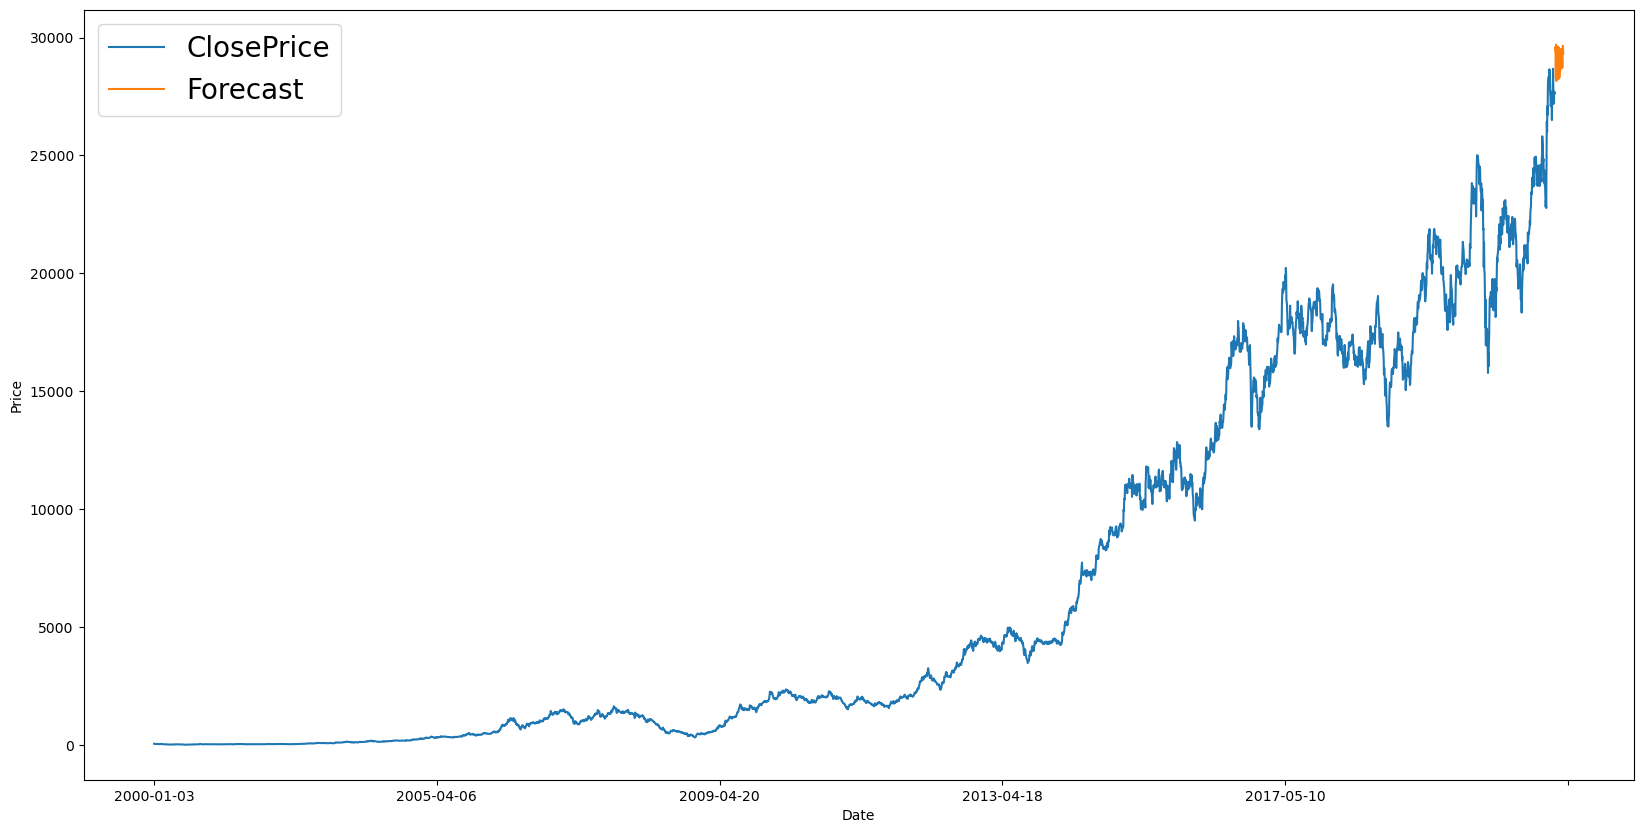

In [262]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')